In [2]:
from orbit_generation.dataset import get_first_period_dataset
from orbit_generation.evaluation import evaluate_distance_metrics_and_clustering, machine_learning_evaluation
from orbit_generation.data import TSFeatureWiseScaler
from orbit_generation.dataset import get_first_period_dataset
from orbit_generation.stats import calculate_per_orbit_spatial_statistics

import torch
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

# Data

In [3]:
data_path = r"/orbit-generation/data/orbits_fix_1500/EM_N_fix_1500.h5"
experiments_folder = "../experiments"
seq_len=100

In [4]:
data, orbit_df, labels, system_dict = get_first_period_dataset(file_path=data_path, segment_length=seq_len)
scaler = TSFeatureWiseScaler()        
scaled_data = scaler.fit_transform(torch.tensor(data, dtype=torch.float32))
scaled_data=scaled_data.numpy()
scaled_data = scaled_data[:,1:,:]
scaled_data.shape

(45211, 6, 100)

In [5]:
orbits_id_classes = np.array([orbit_df.at[index, 'id_class'] for index in labels])
orbits_id_classes.shape

(45211,)

In [6]:
feature_names = ['period', 'jacobi']
features = orbit_df[feature_names].values
features.shape

(45211, 2)

In [7]:
initial_conditions = scaled_data[:, :, 0]
initial_conditions.shape

(45211, 6)

In [8]:
position_stats = calculate_per_orbit_spatial_statistics(scaled_data)
position_stats = position_stats.reshape(position_stats.shape[0], -1)
position_stats.shape

(45211, 36)

In [9]:
# concatenate features and position stats
features_pos_stats = np.concatenate([features, position_stats], axis=1)
features_pos_stats.shape

(45211, 38)

In [10]:
scaler = StandardScaler()
scaled_features_pos_stats = scaler.fit_transform(features_pos_stats)
scaled_features_pos_stats.shape

(45211, 38)

In [11]:
stop

NameError: name 'stop' is not defined

# Distance Clustering

## Physical

All metrics and algorithms with 100 samples

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing dtw distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


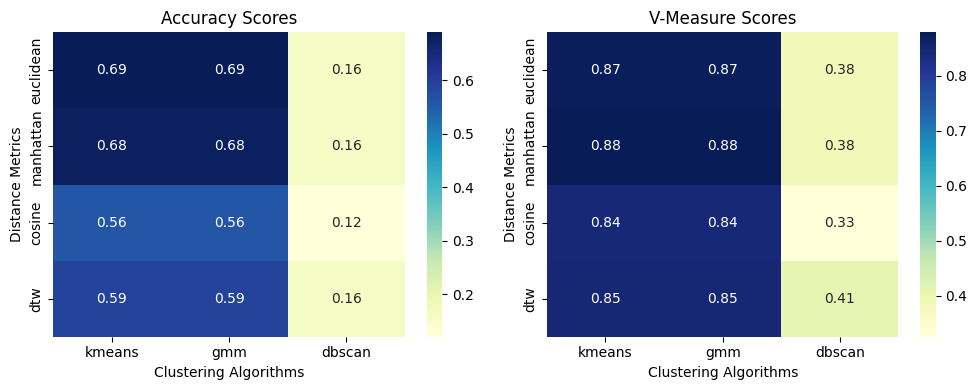

In [6]:
num_samples = 100
indices = np.random.choice(len(data), num_samples, replace=False)

sampled_data = scaled_data[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_data, sampled_classes, evaluation_metrics=['Accuracy', 'V-Measure'])

Evaluate 'euclidean' and 'kmeans' with all orbits

Computing euclidean distances...
Clustering with kmeans...


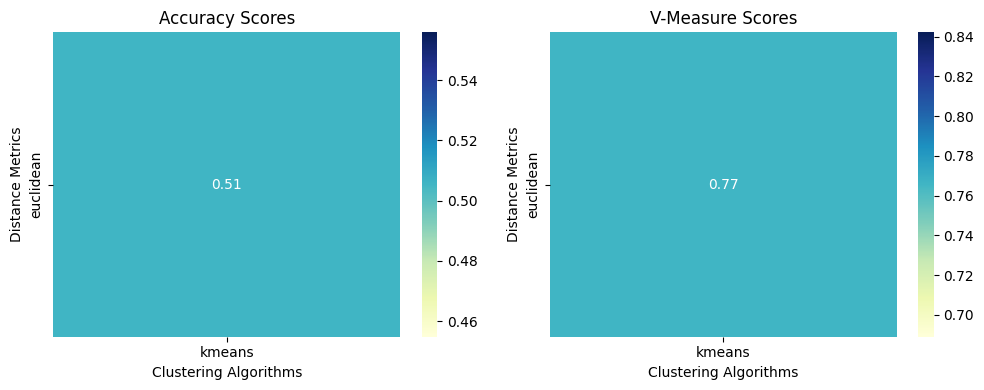

{'euclidean_kmeans': {'Accuracy': np.float64(0.5053416204021145), 'V-Measure': np.float64(0.7655960140849384)}}


In [7]:
results = evaluate_distance_metrics_and_clustering(scaled_data, orbits_id_classes, distance_metrics=['euclidean'],
                                                   clustering_algorithms=['kmeans'], plot_results=True,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

## Feature

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing dtw distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


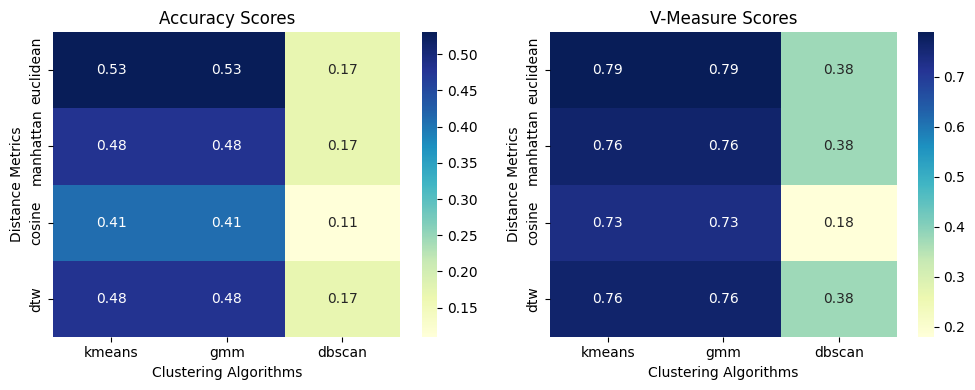

In [19]:
num_samples = 100
indices = np.random.choice(len(features), num_samples, replace=False)

sampled_features = features[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_features, sampled_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])

Computing euclidean distances...
Clustering with kmeans...


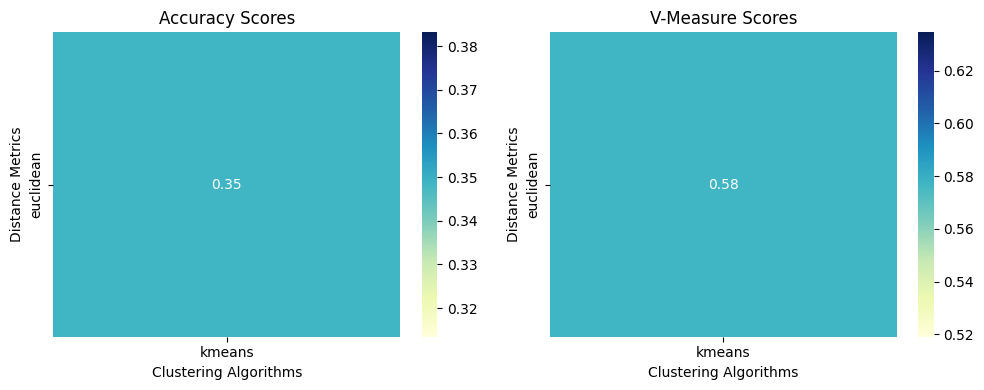

{'euclidean_kmeans': {'Accuracy': np.float64(0.34830019243104554), 'V-Measure': np.float64(0.576799782339345)}}


In [23]:
results = evaluate_distance_metrics_and_clustering(features, orbits_id_classes, distance_metrics=['euclidean'],
                                                   clustering_algorithms=['kmeans'], plot_results=True,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

## Initial Conditions

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing dtw distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


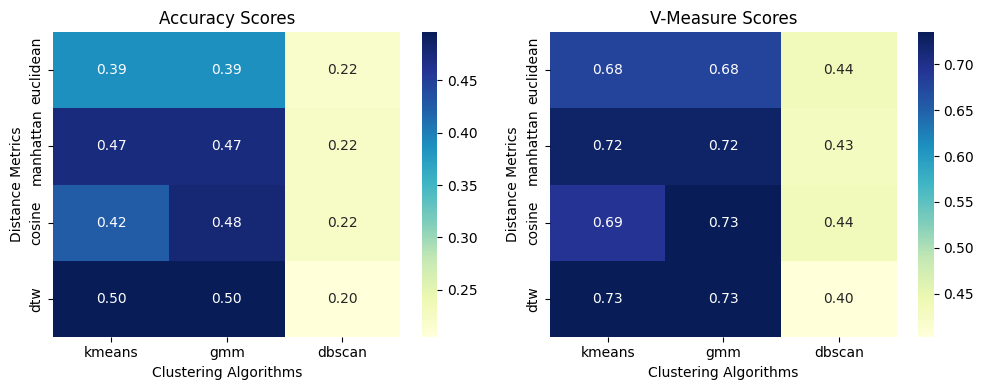

In [10]:
num_samples = 1000
indices = np.random.choice(len(initial_conditions), num_samples, replace=False)

sampled_ics = initial_conditions[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_ics, sampled_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'],
                                                   distance_metrics=['euclidean', 'cosine', 'manhattan'])

Computing euclidean distances...
Clustering with kmeans...


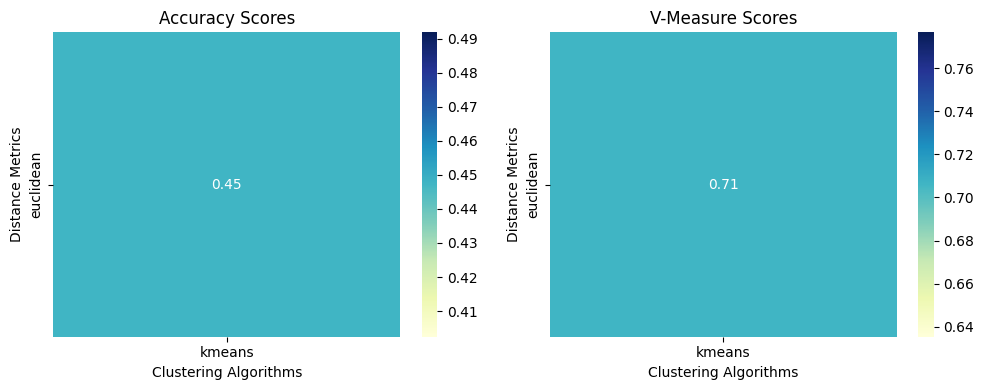

In [24]:
results = evaluate_distance_metrics_and_clustering(initial_conditions, orbits_id_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'],
                                                   distance_metrics=['euclidean'],
                                                   clustering_algorithms=['kmeans'])

## Grouped Spatial Coordinates

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


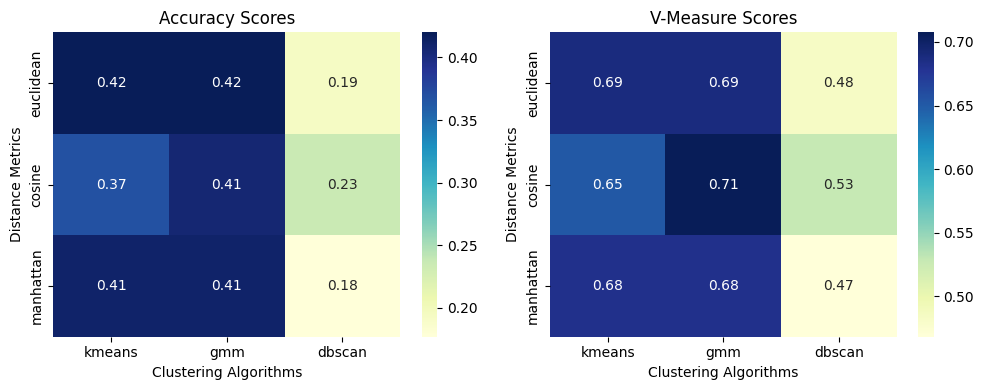

In [13]:
num_samples = 1000
indices = np.random.choice(len(initial_conditions), num_samples, replace=False)

sampled_pos_stats = position_stats[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_pos_stats, sampled_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'],
                                                   distance_metrics=['euclidean', 'cosine', 'manhattan'])

Computing euclidean distances...
Clustering with kmeans...


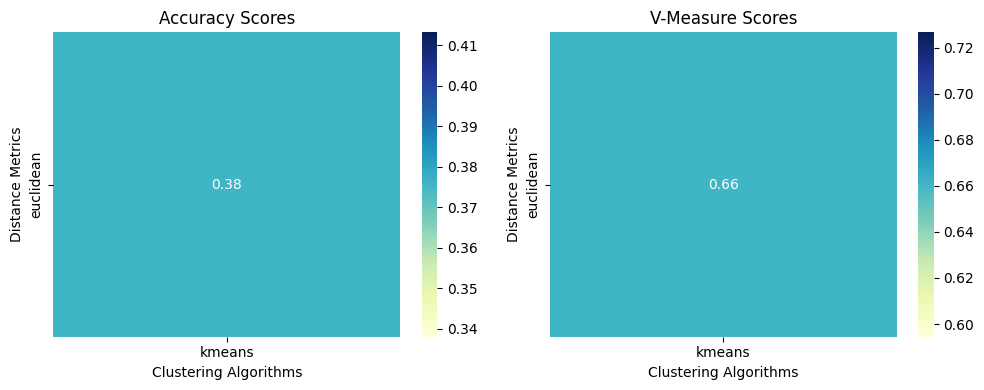

In [25]:
results = evaluate_distance_metrics_and_clustering(position_stats, orbits_id_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'],
                                                   distance_metrics=['euclidean'],
                                                   clustering_algorithms=['kmeans'])

## Features + Grouped Spatial Coordinates

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


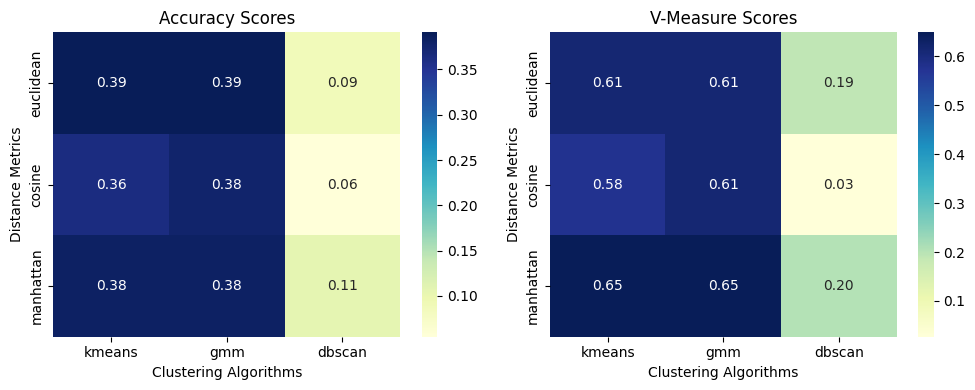

In [21]:
num_samples = 1000
indices = np.random.choice(len(initial_conditions), num_samples, replace=False)

sampled_features_pos_stats = features_pos_stats[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_features_pos_stats, sampled_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'],
                                                   distance_metrics=['euclidean', 'cosine', 'manhattan'])

Computing euclidean distances...
Clustering with kmeans...


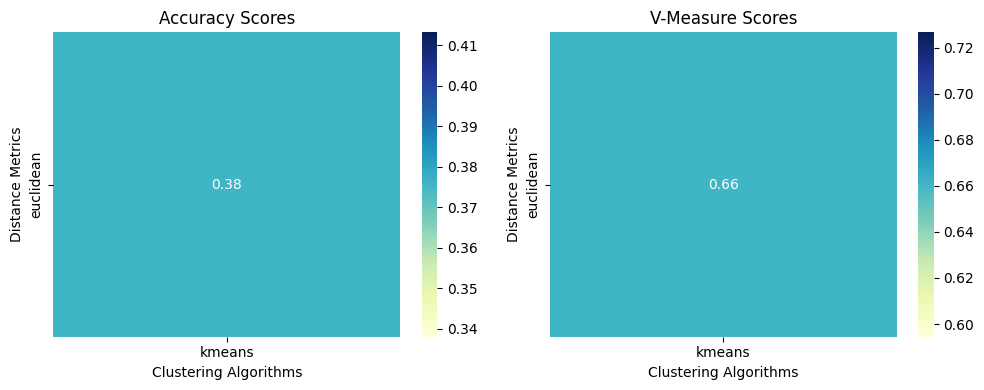

In [26]:
results = evaluate_distance_metrics_and_clustering(position_stats, orbits_id_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'],
                                                   distance_metrics=['euclidean'],
                                                   clustering_algorithms=['kmeans'])

# Machine Learning

In [11]:
results = []

## Orbits

In [14]:
data_2d = data.reshape(data.shape[0], -1)
data_2d.shape

(45211, 700)

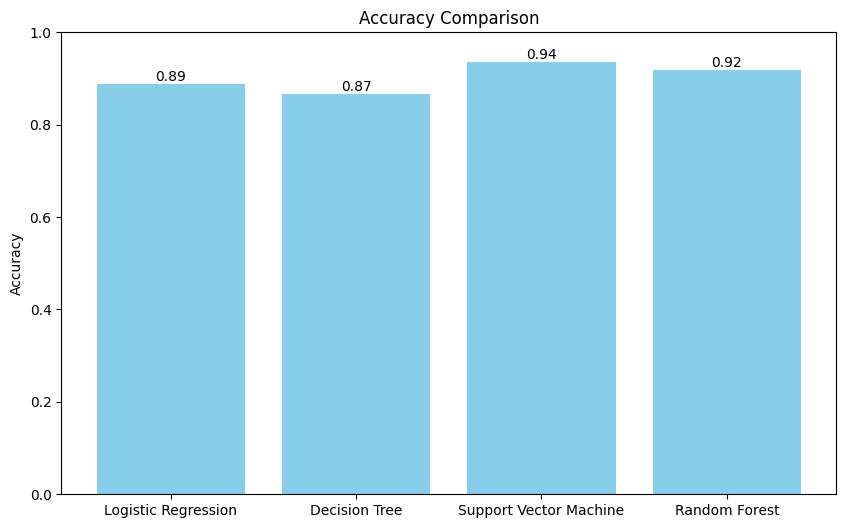

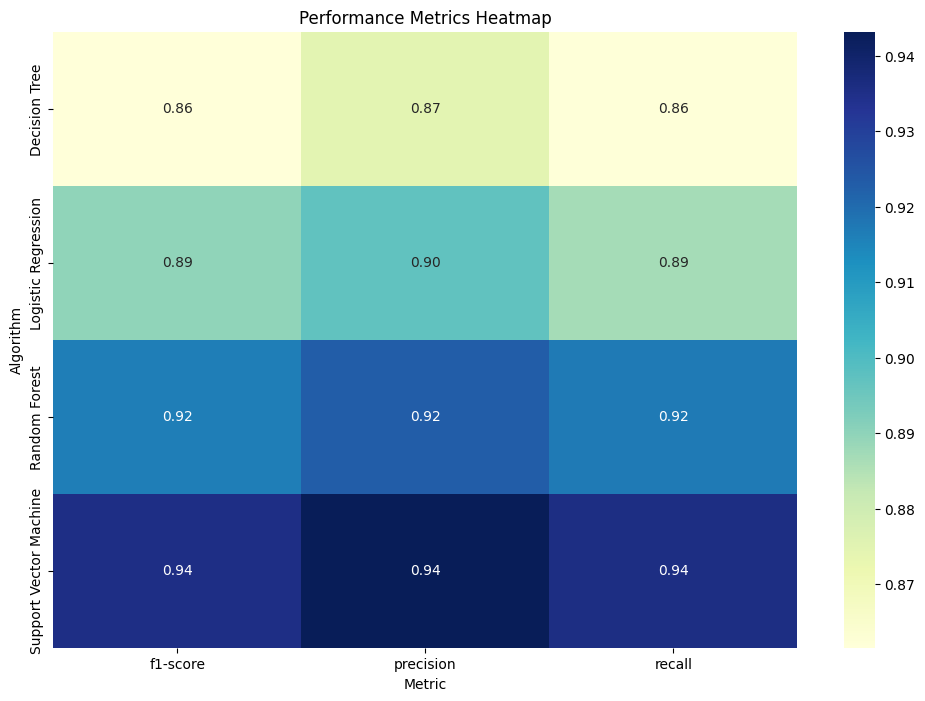

In [15]:
results.append(machine_learning_evaluation(data_2d, orbits_id_classes, print_results=True))

## Features

In [16]:
features.shape

(45211, 2)

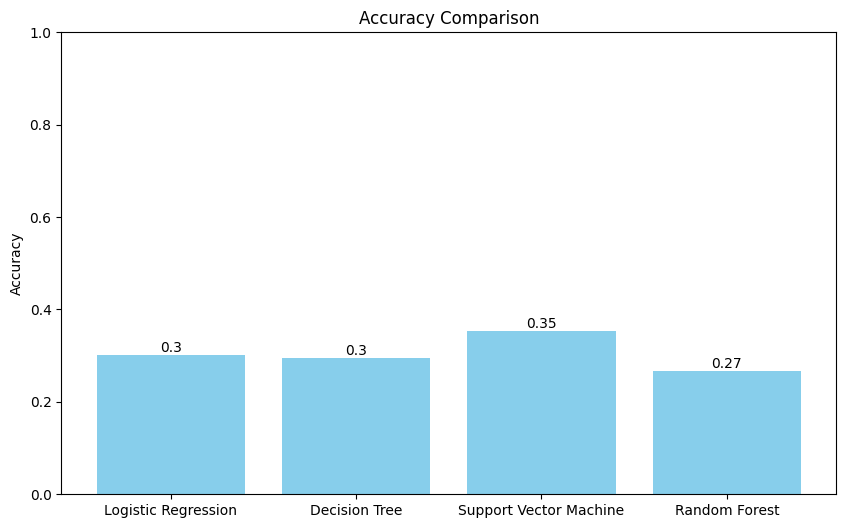

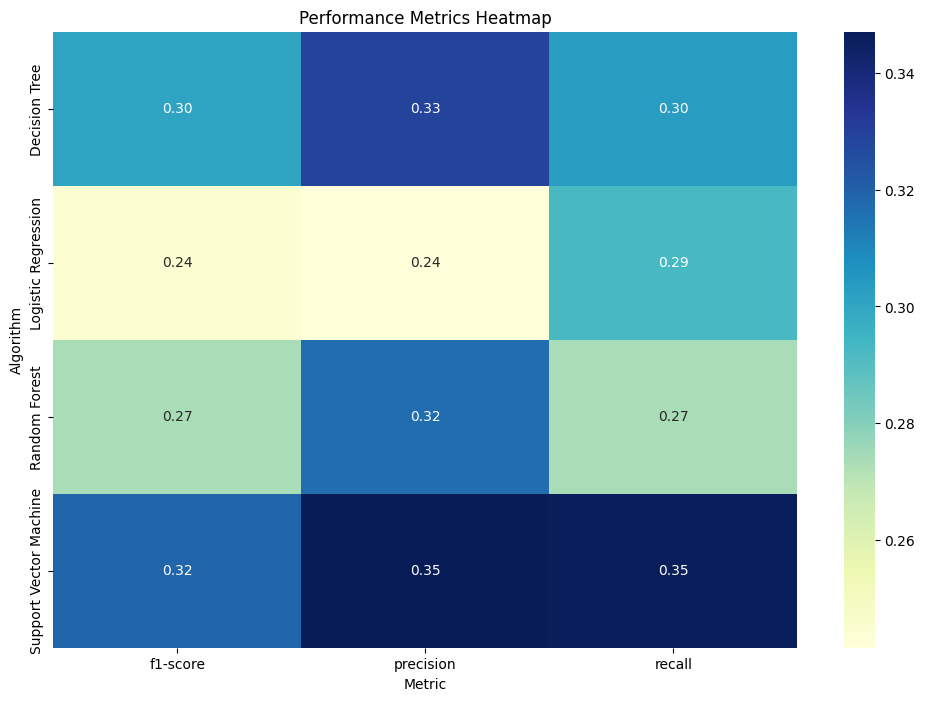

In [17]:
results.append(machine_learning_evaluation(features, orbits_id_classes, print_results=True))

## Initial Conditions

In [18]:
initial_conditions.shape

(45211, 6)

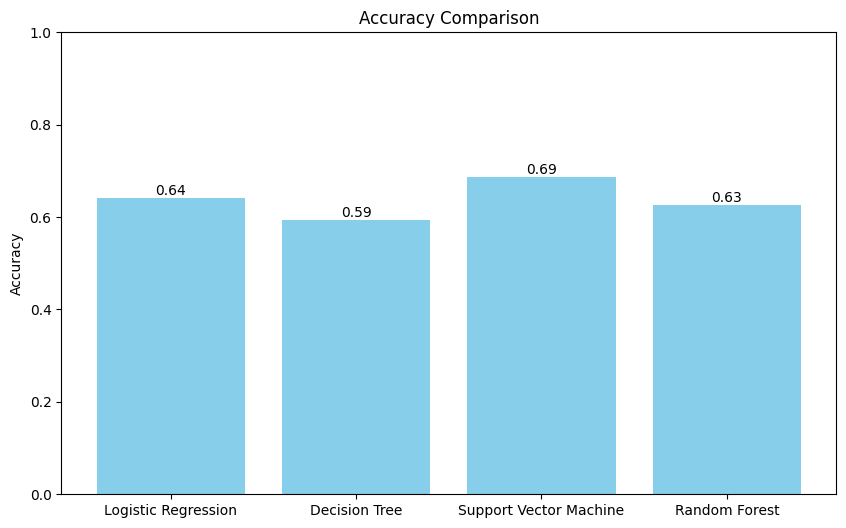

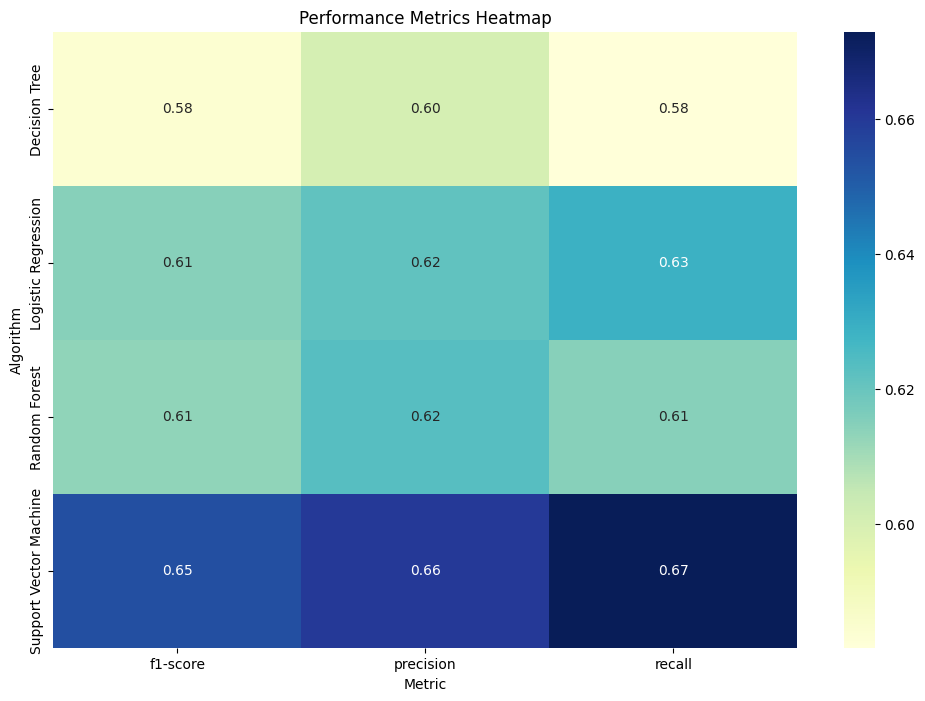

In [19]:
results.append(machine_learning_evaluation(initial_conditions, orbits_id_classes, print_results=True))

## Grouped Spatial Coordinates

In [15]:
position_stats.shape

(45211, 36)

In [16]:
position_stats.shape

(45211, 36)

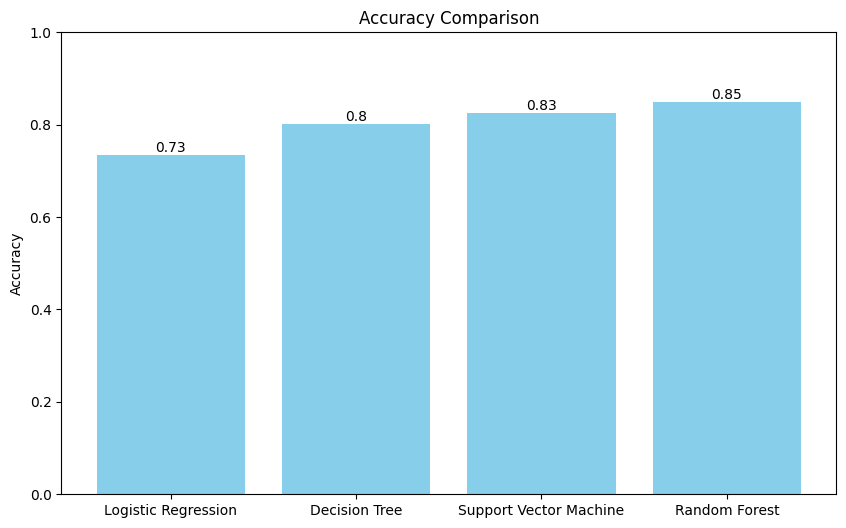

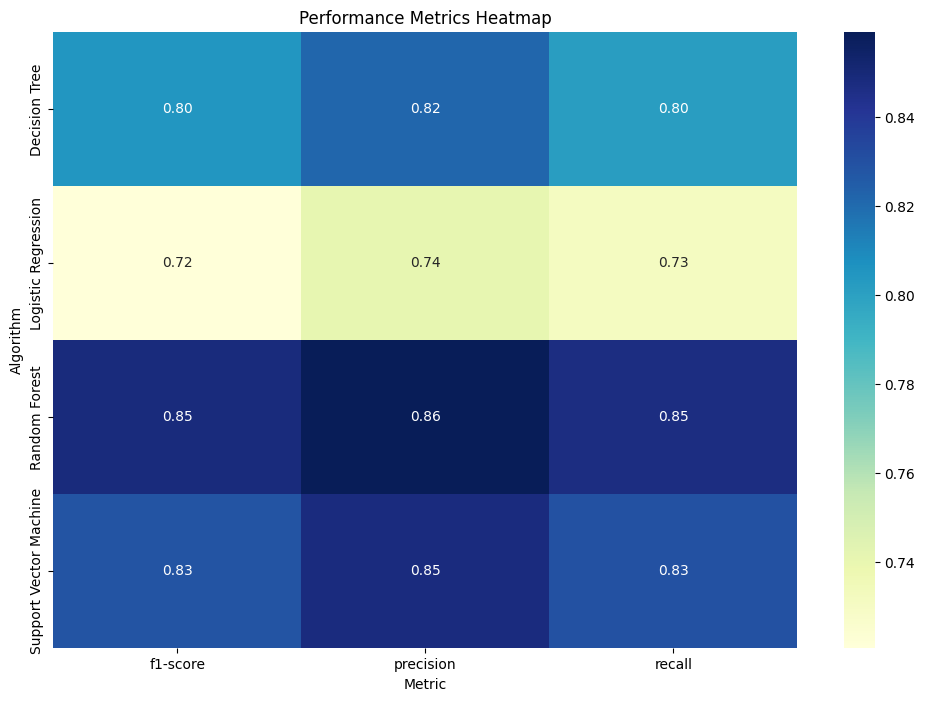

In [23]:
results.append(machine_learning_evaluation(position_stats, orbits_id_classes, print_results=True))

## Features + Grouped Spatial Coordinates

In [13]:
scaled_features_pos_stats.shape

(45211, 38)

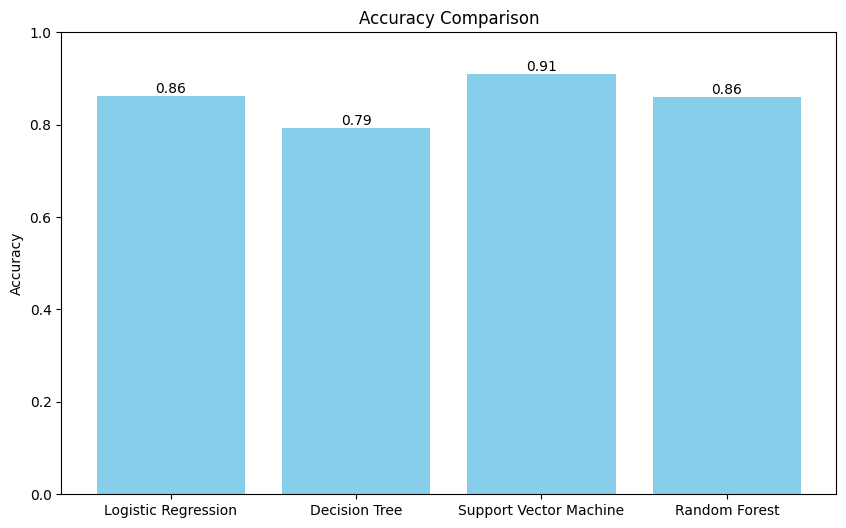

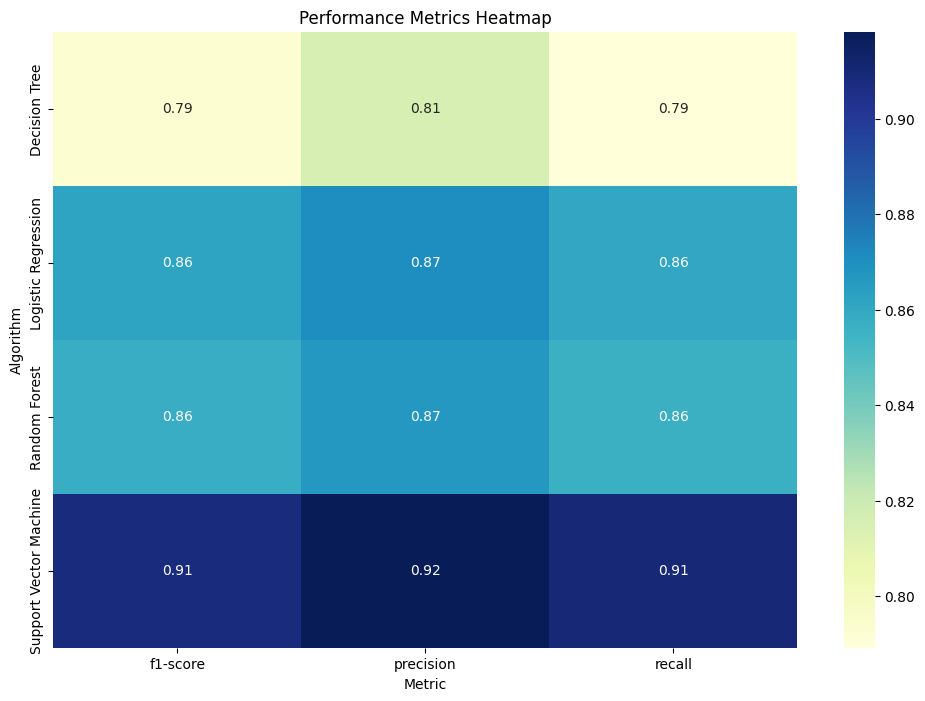

In [20]:
results.append(machine_learning_evaluation(features_pos_stats, orbits_id_classes, print_results=True, scale_data=False, return_best_model=True))

## All

Orbits: 0.9355466589989162
Features: 0.35250270951759527
ICs: 0.6866912919422264
Grouped Spatial Conditions (GSC): 0.8732830505850346
GSC + Features: 0.9108402822322001


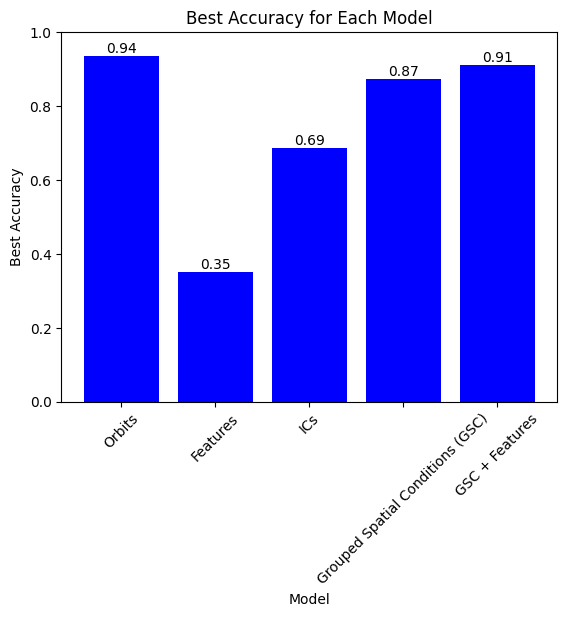

In [25]:
import matplotlib.pyplot as plt

def plot_best_accuracies(results):
    # Initialize a list to hold the best accuracies
    best_accuracies = [0] * 5  # For 'Orbits', 'Features', 'ICs', 'Grouped Spatial Conditions (GSC)', 'GSC + Features'
    data_labels = ['Orbits', 'Features', 'ICs', 'Grouped Spatial Conditions (GSC)', 'GSC + Features']
    
    # Iterate through the results to find the best accuracy for each model
    for i, result in enumerate(results):
        # Get the maximum accuracy from all model names
        accuracy = max(result.values(), key=lambda x: x['accuracy'])['accuracy']
        best_accuracies[i] = accuracy

    # Print each accuracy with the corresponding label
    for label, accuracy in zip(data_labels, best_accuracies):
        print(f"{label}: {accuracy}")

    # Create a bar plot
    bars = plt.bar(data_labels, best_accuracies, color='blue')
    plt.xlabel('Model')
    plt.ylabel('Best Accuracy')
    plt.title('Best Accuracy for Each Model')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

    # Add accuracy numbers on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.show()

plot_best_accuracies(results)

# Model Analysis

In [12]:
scaled_features_pos_stats.shape


(45211, 38)

In [13]:
orbits_id_classes.shape

(45211,)

## Get models

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def grid_search_models(X, y, models, param_grids):
    best_models = {}
    
    for model_name, model in models.items():
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X, y)
        
        best_models[model_name] = grid_search.best_estimator_
        
        # Print every result for any combination
        for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
            print(f"Model: {model_name}, Parameters: {params}, Accuracy: {score:.4f}")
        
        print(f"Best model for {model_name}: {grid_search.best_estimator_}")
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best accuracy for {model_name}: {grid_search.best_score_:.4f}\n")
    
    return best_models


models = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier()
}

param_grids = {
    'SVC': {'kernel': ['linear']},
    'RandomForest': {}
}


In [27]:
best_models = grid_search_models(scaled_features_pos_stats, orbits_id_classes, models, param_grids)

Model: SVC, Parameters: {'kernel': 'linear'}, Accuracy: 0.9083
Best model for SVC: SVC(kernel='linear')
Best parameters for SVC: {'kernel': 'linear'}
Best accuracy for SVC: 0.9083

Model: RandomForest, Parameters: {}, Accuracy: 0.8674
Best model for RandomForest: RandomForestClassifier()
Best parameters for RandomForest: {}
Best accuracy for RandomForest: 0.8674



In [29]:
#save best model SVC
with open(f"../../models/02_fam_class_fgsc_svc.pkl", "wb") as f:
    pickle.dump(best_models['SVC'], f)

#save best model random forest
with open(f"../../models/02_fam_class_fgsc_rf.pkl", "wb") as f:
    pickle.dump(best_models['RandomForest'], f)


## Inspection

In [30]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Feature Importance based on coefficients
def plot_svc_feature_importance(svc_model, feature_names):
    # Get absolute coefficients
    importance = np.abs(svc_model.coef_[0])
    # Create feature importance dataframe
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), feature_importance['importance'])
    plt.xticks(range(len(importance)), feature_importance['feature'], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('SVC Feature Importance')
    plt.tight_layout()
    plt.show()

def plot_rf_feature_importance(rf_model, feature_names):
    # Get feature importance
    importance = rf_model.feature_importances_
    # Create feature importance dataframe
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), feature_importance['importance'])
    plt.xticks(range(len(importance)), feature_importance['feature'], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.tight_layout()
    plt.show()

# For both models - Permutation Importance
def plot_permutation_importance(model, X, y, feature_names):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    
    # Create and sort feature importance dataframe
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': result.importances_mean,
        'std': result.importances_std
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance['importance'])
    plt.errorbar(range(len(feature_importance)), 
                feature_importance['importance'],
                yerr=feature_importance['std'],
                fmt='none', c='black', capsize=5)
    plt.xticks(range(len(feature_importance)), feature_importance['feature'], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Mean Importance')
    plt.title('Permutation Feature Importance')
    plt.tight_layout()
    plt.show()

def model_analysis(model, X, y):
    # Get predictions
    y_pred = model.predict(X)
    
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

In [31]:
feature_names = [
    # Position X statistics
    'posx_min', 'posx_mean', 'posx_max', 'posx_25percentile', 'posx_median', 'posx_75percentile',
    # Position Y statistics
    'posy_min', 'posy_mean', 'posy_max', 'posy_25percentile', 'posy_median', 'posy_75percentile',
    # Position Z statistics
    'posz_min', 'posz_mean', 'posz_max', 'posz_25percentile', 'posz_median', 'posz_75percentile',
    # Velocity X statistics
    'velx_min', 'velx_mean', 'velx_max', 'velx_25percentile', 'velx_median', 'velx_75percentile',
    # Velocity Y statistics
    'vely_min', 'vely_mean', 'vely_max', 'vely_25percentile', 'vely_median', 'vely_75percentile',
    # Velocity Z statistics
    'velz_min', 'velz_mean', 'velz_max', 'velz_25percentile', 'velz_median', 'velz_75percentile',
    # Features
    'period', 'jacobi'
]

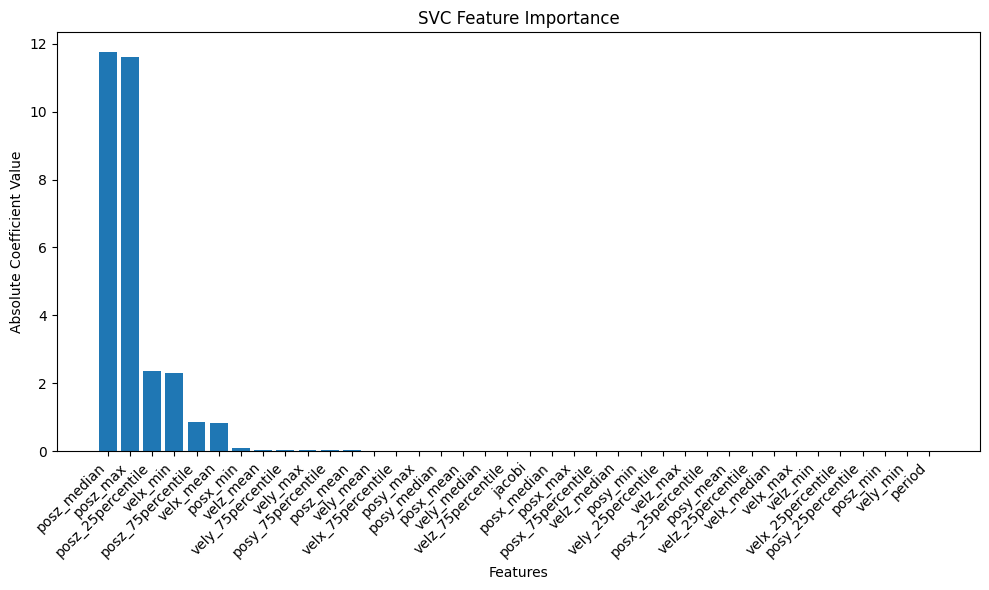

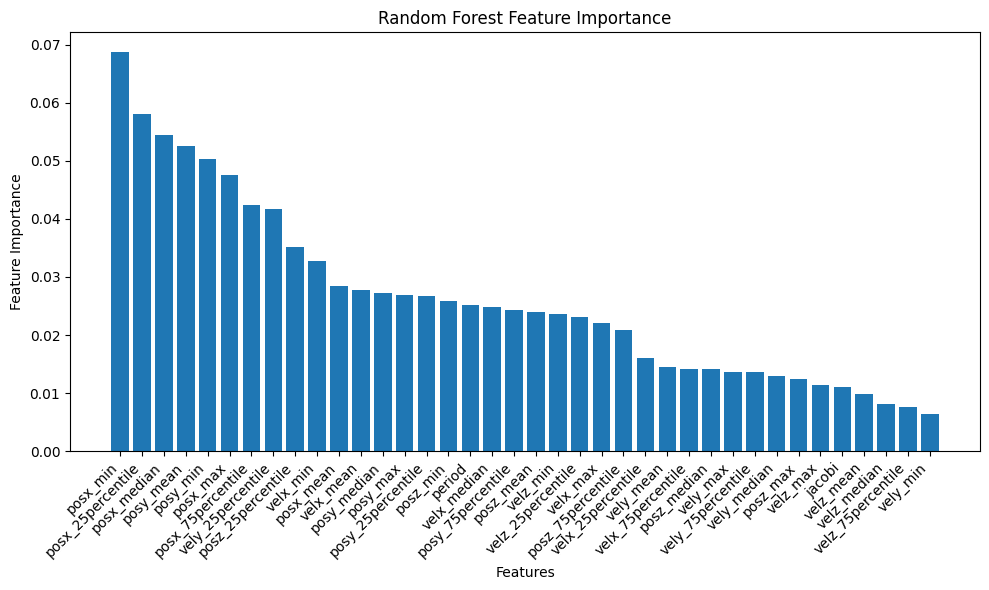

In [32]:
# For SVC
plot_svc_feature_importance(best_models['SVC'], feature_names)
# For Random Forest
plot_rf_feature_importance(best_models['RandomForest'], feature_names)

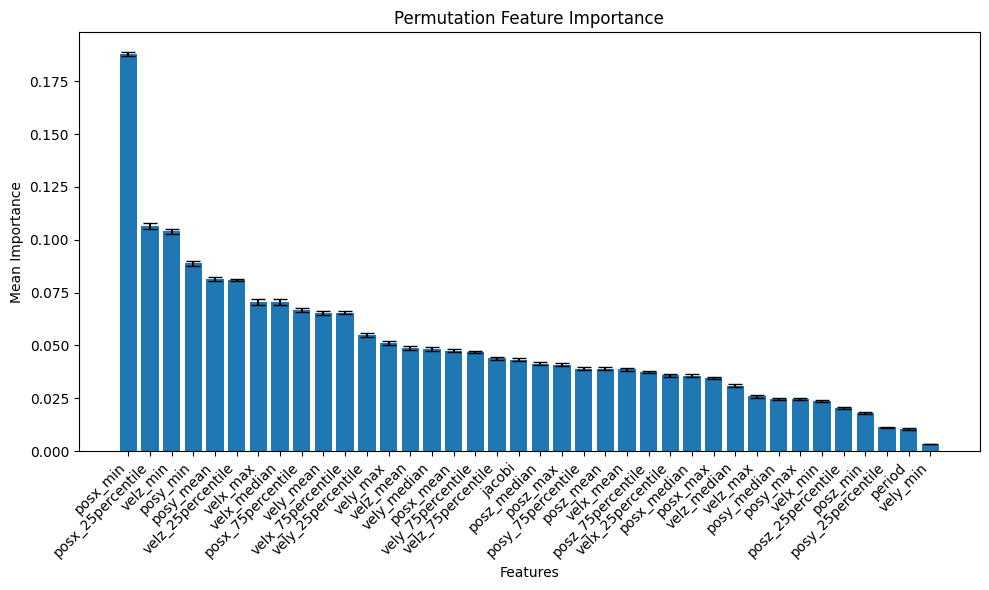

In [33]:
# Permutation importance for both
plot_permutation_importance(best_models['SVC'], scaled_features_pos_stats, orbits_id_classes, feature_names)
plot_permutation_importance(best_models['RandomForest'], scaled_features_pos_stats, orbits_id_classes, feature_names)

In [ ]:
# Detailed analysis for both models
print("SVC Analysis:")
model_analysis(best_models['SVC'], scaled_features_pos_stats, orbits_id_classes)
print("\nRandom Forest Analysis:")
model_analysis(best_models['RandomForest'], scaled_features_pos_stats, orbits_id_classes)
